
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [763]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [764]:
data  = pd.read_csv('./data/pokemon/pokemon.csv')
data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [765]:
data.shape

(801, 41)

In [766]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [767]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [768]:
data.describe(include=["object"])

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Fushigidaneフシギダネ,Bulbasaur,water,flying
freq,29,250,8,1,1,114,95


In [769]:
data[['abilities', 'capture_rate', 'classfication', 'japanese_name', 'name', 'type1', 'type2']]

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
0,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison
1,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison
2,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison
3,"['Blaze', 'Solar Power']",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,NaN
4,"['Blaze', 'Solar Power']",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,NaN
...,...,...,...,...,...,...,...
796,['Beast Boost'],25,Launch Pokémon,Tekkaguyaテッカグヤ,Celesteela,steel,flying
797,['Beast Boost'],255,Drawn Sword Pokémon,Kamiturugiカミツルギ,Kartana,grass,steel
798,['Beast Boost'],15,Junkivore Pokémon,Akuzikingアクジキング,Guzzlord,dark,dragon
799,['Prism Armor'],3,Prism Pokémon,Necrozmaネクロズマ,Necrozma,psychic,NaN


In [770]:
data[data['capture_rate'] == '30 (Meteorite)255 (Core)']

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,...,NaN,774,100,60,120,rock,flying,40.0,7,0


In [771]:
data = data[data['capture_rate'] != '30 (Meteorite)255 (Core)']
data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [772]:
data['capture_rate'] = pd.to_numeric(data['capture_rate'], errors='coerce')
data['capture_rate']

/tmp/ipykernel_8665/1241181371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['capture_rate'] = pd.to_numeric(data['capture_rate'], errors='coerce')


0       45
1       45
2       45
3       45
4       45
      ... 
796     25
797    255
798     15
799      3
800      3
Name: capture_rate, Length: 800, dtype: int64

Vamos a revisar los duplicados

In [773]:
data[data.duplicated()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


In [774]:
data[data['name'].duplicated()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


No hay duplicados, ya sea por row completa o nombre

Vamos a buscar que columnas tienen filas sin valores para entender que deberiamos hacer

In [775]:
emptys = data.isnull().sum()
emptys[emptys != 0]

height_m            20
percentage_male     97
type2              384
weight_kg           20
dtype: int64

Analicemos un poco los datos que me faltan:

- Que falten type_2 solo me dice que hay 384 pokemones que solo tienen un tipo
- Falta informacion de peso y altura de 20 pokemones. Habria que ver si son los mismos pokemones. No trataria de completarlos con nada porque los pokemones entre si no son parecidos entonces ninguna estrategia para completar los valores seria verdaramente representativa
- Falta informacion sobre el porcentaje de machos de 98 pokemones. Igual que en el punto anterior no seria representativo tratar de completar estos valores con algun estimado. Ademas que no tenga informacion sobre esto nos puede hablar de lo poco que se sabe de este pokemon o de que hay solo uno que no tiene sexo.

In [776]:
imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = -1)
imp_0.fit(data[['height_m', 'weight_kg', 'percentage_male']])
data[['height_m', 'weight_kg', 'percentage_male']] = imp_0.transform(data[['height_m', 'weight_kg', 'percentage_male']])

emptys = data.isnull().sum()
emptys[emptys != 0]

/tmp/ipykernel_8665/3199026706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['height_m', 'weight_kg', 'percentage_male']] = imp_0.transform(data[['height_m', 'weight_kg', 'percentage_male']])


type2    384
dtype: int64

Voy a modificar la columna de `is_legendary` para pasarla a boolean en vez de int

In [777]:
data['is_legendary'] = data['is_legendary'].astype(bool)

/tmp/ipykernel_8665/3347816436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_legendary'] = data['is_legendary'].astype(bool)


Algun analisis de las columnas:

 - Todas las columnas de `against_x` por ahora no me dan mucha informacion porque estan mas relacionados con el tipo del pokemon que otra cosa
 - El `pokedex_number` puedo usarlo de ID o index. No se si me suma mucho pero al menos me lo va a ordenar en terminos de generaciones. Ademas me va a ayudar a eliminar duplicados, en conjunto con el `name` tal vez.
 - `hp`, `attack`, `sp_attack`, `defense` y `sp_defense` me dejan saber bastante del pokemon en funcion a su capacidad. Los pokemones legendarios suelen ser mas fuertes y tienen mas defensa.
 - `percentage_male`, `height` y `weight` creeria que no suman mucho valor a si es legendario o no (Articuno, Zapdos y Moltres deben ser pesados pero Mew es chiquito y liviano)

 

Vamos a sacar los nombres ya que no podemos encodearlos y en principio no deberian darnos ningun tipo de informacion sobre si es legendario o no

In [778]:
data = data.drop(['name', 'japanese_name'], axis=1)

Tenemos que encodear de alguna manera las `abilities`, la `classfication`, `type1` y `type2`

In [779]:
data = pd.get_dummies(data, columns=['type1', 'type2', 'classfication', 'abilities'])
data.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass',
       ...
       'abilities_['Water Absorb', 'Hydration']',
       'abilities_['Water Absorb', 'Shell Armor', 'Hydration']',
       'abilities_['Water Absorb']',
       'abilities_['Water Bubble', 'Water Absorb']',
       'abilities_['Water Compaction', 'Sand Veil']',
       'abilities_['Water Veil', 'Oblivious', 'Pressure']',
       'abilities_['White Smoke', 'Drought', 'Shell Armor']',
       'abilities_['Wimp Out']', 'abilities_['Wonder Guard']',
       'abilities_['Wonder Skin ', 'Magic Guard', 'Tinted Lens']'],
      dtype='object', length=1139)

Ahora quiero hacer un analisis de PCA para conocer mejor el dataset. Empiezo haciendo algunas pruebas

In [780]:
Y = data[['is_legendary']]
X = data.drop(['is_legendary'], axis=1)

In [781]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
pca_features = pca.fit_transform(X)
pca_features

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

pca_df['is_legendary'] = Y
pca_df

,PC1,PC2,PC3,is_legendary
0,4837.782555,-2150.194871,389.210911,False
1,4837.803081,-2149.287871,384.713034,False
2,4837.866689,-2146.524627,372.180636,False
3,4837.781335,-2150.258525,386.756631,False
4,4837.804640,-2149.231418,381.769837,False
...,...,...,...,...
795,195347.958385,20545.868267,-255.142542,True
796,195347.774208,20538.243698,-220.202425,True
797,195347.942402,20545.167210,-253.704995,True
798,195347.839262,20541.130243,-234.144068,True


In [782]:
pca_df.describe()

,PC1,PC2,PC3
count,8.000000e+02,8.000000e+02,8.000000e+02
mean,4.016329e-11,-1.309672e-12,-1.818989e-14
std,1.603748e+05,6.086324e+03,2.267812e+02
min,-4.549878e+05,-1.231787e+04,-4.132557e+02
25%,-5.501515e+04,-2.504453e+03,-1.928363e+02
50%,-5.497582e+04,-1.230912e+03,-1.921754e-01
75%,4.837921e+03,4.994203e+01,1.905284e+02
max,5.849883e+05,2.345050e+04,4.183874e+02


In [783]:
pca.explained_variance_

array([2.57200753e+10, 3.70433338e+07, 5.14297103e+04])

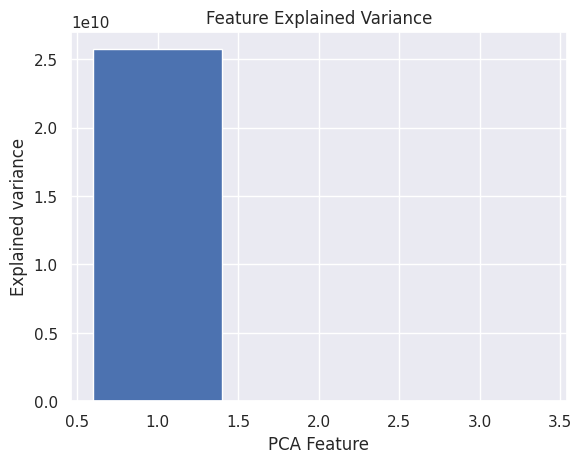

In [784]:
sns.set()

variance = dict(zip([]))
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

Visualizamos la idea de explained_variance en los siguientes dos graficos 

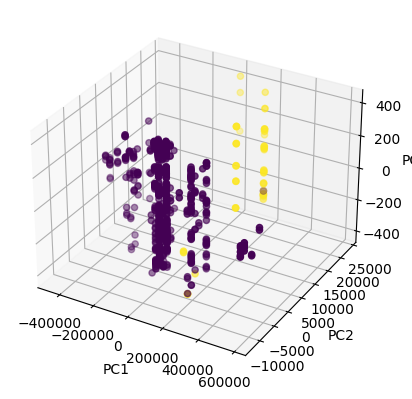

In [785]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = pca_df["PC1"]
ydata = pca_df["PC2"]
zdata = pca_df["PC3"]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=pca_df['is_legendary'], cmap='viridis',)

 
# Plot x, y, z labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

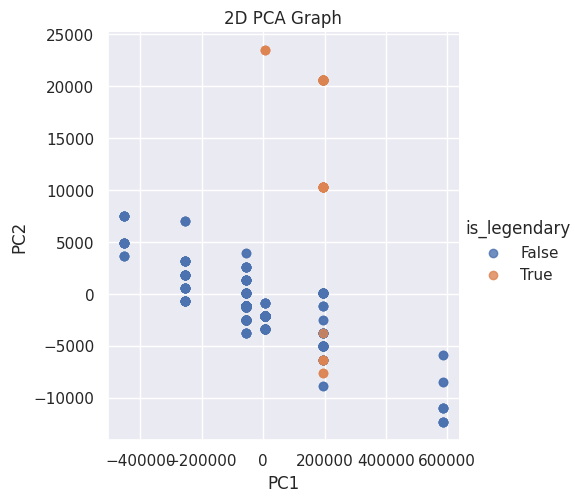

In [786]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='is_legendary', 
    fit_reg=False, 
    legend=True
    )

# ax = sns.stripplot(data=pca_df, x="PC1", y="is_legendary", legend=True)

# ax.set_xticks([0, 1000, 2000, 10000, 20000, 100000],[0, "1k", "2k", "10k", "20k", "100k"]) #custom tickers with custom labels

ax.tick_params(axis='x', labelrotation=90)
 
plt.title('2D PCA Graph')
plt.show()

In [787]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = X.columns
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
# loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,feature_names
0,1.333262e-07,5.145888e-06,0.000022,against_bug
1,-2.259894e-08,1.478161e-05,0.000055,against_dark
2,3.802232e-07,6.269671e-06,0.000052,against_dragon
3,-1.702711e-07,-5.362039e-06,0.000176,against_electric
4,4.770177e-07,6.092418e-06,-0.000360,against_fairy
...,...,...,...,...
1133,5.693222e-08,-3.997005e-07,0.000005,"abilities_['Water Veil', 'Oblivious', 'Pressure']"
1134,-2.677090e-09,-4.152193e-08,0.000001,"abilities_['White Smoke', 'Drought', 'Shell Ar..."
1135,-2.677090e-09,-4.151610e-08,-0.000009,abilities_['Wimp Out']
1136,-2.214016e-08,1.222160e-07,0.000002,abilities_['Wonder Guard']


In [791]:
loadings_df.sort_values(by=['PC1'], ascending=False).head(10)

,PC1,PC2,PC3,feature_names
24,0.999883,-0.015322,0.000023,experience_growth
19,0.015319,0.999785,0.007418,base_egg_steps
21,0.000191,0.008464,-0.032680,base_total
32,0.000167,0.006684,-0.032816,weight_kg
28,0.000122,0.006812,-0.998551,pokedex_number
18,0.000048,0.001374,-0.012427,attack
29,0.000041,0.001888,-0.005809,sp_attack
26,0.000036,0.001315,-0.006120,hp
31,0.000026,0.001207,0.006564,speed
23,0.000025,0.001182,-0.009326,defense


Hay un solo componente de un analisis de PCA

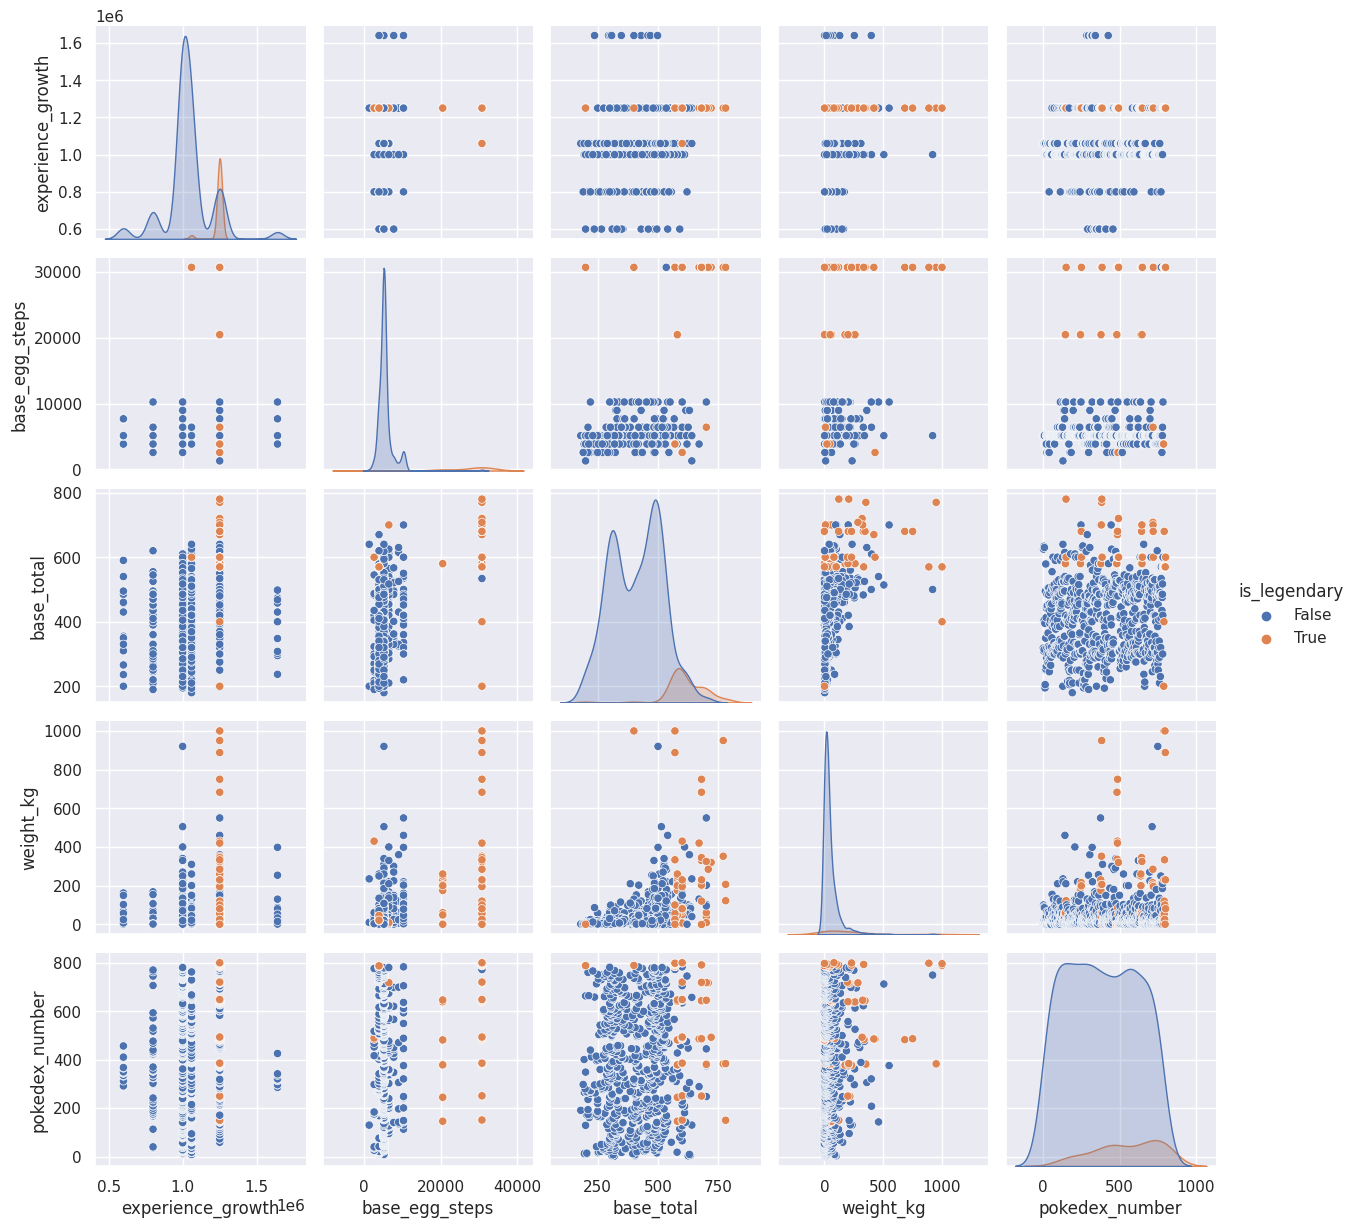

In [790]:
# reduced_data = data[['experience_growth','base_egg_steps', 'base_total', 'weight_kg', 'pokedex_number', 'attack', 'sp_attack', 'hp', 'speed', 'defense', 'is_legendary']]
reduced_data = data[['experience_growth','base_egg_steps', 'base_total', 'weight_kg', 'pokedex_number', 'is_legendary']]

sns.pairplot(reduced_data, hue='is_legendary')

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor